In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Load data from csv
df1 = pd.read_csv("europedailyprices.csv", parse_dates=["Date"], index_col="Date")

# Define confidence level and holding period
conf_level = 0.99
holding_period = 144 * 30  # 144 months * 30 days/month

# Define monthly amount to invest in one index
monthly_investment = 100

# Calculate daily returns
returns = df1.pct_change()

# Calculate mean and standard deviation of returns for each index
mean_returns = returns.mean()
std_returns = returns.std()

# Create DataFrame to store VaR for each month
var_df = pd.DataFrame(index=pd.date_range(start=df1.index[0], end=df1.index[-1], freq='MS'))

# Loop through each month
for month in var_df.index:
    # Define start and end dates for the month
    start_date = month
    end_date = start_date + pd.DateOffset(months=1) - pd.DateOffset(days=1)

    # Calculate portfolio value for the month
    portfolio_value = pd.DataFrame(np.zeros_like(df1.loc[start_date:end_date]), index=df1.loc[start_date:end_date].index, columns=df1.columns)
    cumulative_investment = 0
    for i, date in enumerate(df1.loc[start_date:end_date].index):
        if i % 30 == 0 and cumulative_investment < 14400:
            index_name = 'IT40'  # Replace with the index you want to invest in
            amount_to_invest = monthly_investment
            shares_to_buy = amount_to_invest / df1.loc[date, index_name]
            portfolio_value.loc[date:, index_name] += shares_to_buy * df1.loc[date:, index_name]
            cumulative_investment += monthly_investment
        else:
            portfolio_value.loc[date] = portfolio_value.loc[df1.loc[start_date:end_date].index[i-1]]

    # Calculate portfolio returns for the month
    portfolio_returns = portfolio_value.pct_change()

    # Calculate portfolio mean and standard deviation of returns for the month
    portfolio_mean_return = portfolio_returns.mean().iloc[0]
    portfolio_std_return = portfolio_returns.std().iloc[0]

    # Calculate VaR for the index for the month
    index_name = 'IT40'  # Replace with the index you invested in
    index_returns = returns.loc[start_date:end_date, index_name]
    index_mean_return = mean_returns[index_name]
    index_std_return = std_returns[index_name]

    # Calculate VaR using historical simulation method for the month
    sorted_returns = np.sort(index_returns.dropna())
    portfolio_value_at_risk = sorted_returns[int(np.ceil((1 - conf_level) * len(sorted_returns)))]
    index_value_at_risk = portfolio_value_at_risk * monthly_investment * 144

    # Store VaR for the month in the DataFrame
    var_df.loc[month, index_name] = index_value_at_risk

# Print VaR DataFrame
print(var_df)


                  IT40
2010-02-01 -396.206836
2010-03-01  -97.261006
2010-04-01 -349.752569
2010-05-01 -676.201621
2010-06-01 -546.188920
...                ...
2021-08-01 -121.940235
2021-09-01 -308.027785
2021-10-01 -119.900427
2021-11-01 -233.210325
2021-12-01 -204.846492

[143 rows x 1 columns]


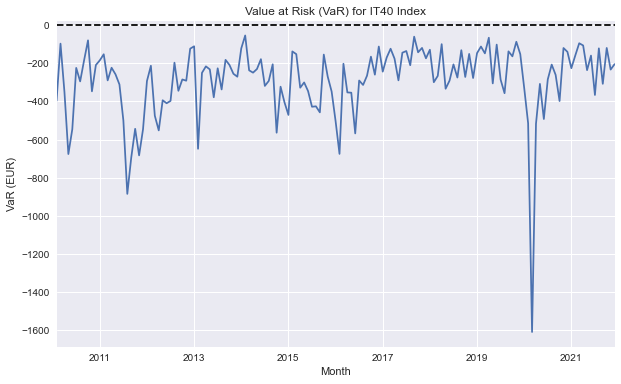

In [2]:
import matplotlib.pyplot as plt

# Set plot style
plt.style.use('seaborn')

# Plot VaR results for IT40 index
var_df['IT40'].plot(kind='line', figsize=(10, 6))

# Set plot title and axis labels
plt.title('Value at Risk (VaR) for IT40 Index')
plt.xlabel('Month')
plt.ylabel('VaR (EUR)')

# Add horizontal line for zero VaR
plt.axhline(y=0, color='black', linestyle='--')

# Show plot
plt.show()


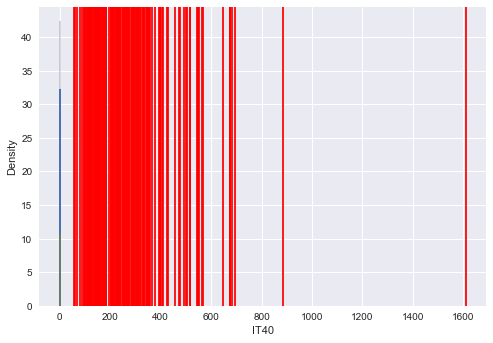

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate monthly returns of the dollar-cost averaging strategy
portfolio_returns = portfolio_value.pct_change().dropna()

# Plot histogram of historical returns
sns.histplot(index_returns, kde=True, stat="density")

# Overlay histogram with KDE plot
sns.kdeplot(index_returns, shade=True)

# Add vertical line for VaR value
for month in var_df.index:
    plt.axvline(x=-var_df.loc[month, index_name], color='red')

# Show plot
plt.show()


In [4]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Load data from csv
df1 = pd.read_csv("europedailyprices.csv", parse_dates=["Date"], index_col="Date")

# Define confidence level and holding period
conf_level = 0.99
holding_period = 144 * 30  # 144 months * 30 days/month

# Define monthly amount to invest in one index
monthly_investment = 100

# Calculate daily returns
returns = df1.pct_change()

# Calculate mean and standard deviation of returns for each index
mean_returns = returns.mean()
std_returns = returns.std()

# Create DataFrame to store VaR for each month
var_df = pd.DataFrame(index=pd.date_range(start=df1.index[0], end=df1.index[-1], freq='MS'))

# Loop through each month
for month in var_df.index:
    # Define start and end dates for the month
    start_date = month
    end_date = start_date + pd.DateOffset(months=1) - pd.DateOffset(days=1)

    # Calculate portfolio value for the month
    portfolio_value = pd.DataFrame(np.zeros_like(df1.loc[start_date:end_date]), index=df1.loc[start_date:end_date].index, columns=df1.columns)
    cumulative_investment = 0
    for i, date in enumerate(df1.loc[start_date:end_date].index):
        if i % 30 == 0 and cumulative_investment < 14400:
            index_name = 'EUSTX50'  # Replace with the index you want to invest in
            amount_to_invest = monthly_investment
            shares_to_buy = amount_to_invest / df1.loc[date, index_name]
            portfolio_value.loc[date:, index_name] += shares_to_buy * df1.loc[date:, index_name]
            cumulative_investment += monthly_investment
        else:
            portfolio_value.loc[date] = portfolio_value.loc[df1.loc[start_date:end_date].index[i-1]]

    # Calculate portfolio returns for the month
    portfolio_returns = portfolio_value.pct_change()

    # Calculate portfolio mean and standard deviation of returns for the month
    portfolio_mean_return = portfolio_returns.mean().iloc[0]
    portfolio_std_return = portfolio_returns.std().iloc[0]

    # Calculate VaR for the index for the month
    index_name = 'EUSTX50'  # Replace with the index you invested in
    index_returns = returns.loc[start_date:end_date, index_name]
    index_mean_return = mean_returns[index_name]
    index_std_return = std_returns[index_name]

    # Calculate VaR using historical simulation method for the month
    sorted_returns = np.sort(index_returns.dropna())
    portfolio_value_at_risk = sorted_returns[int(np.ceil((1 - conf_level) * len(sorted_returns)))]
    index_value_at_risk = portfolio_value_at_risk * monthly_investment * 144

    # Store VaR for the month in the DataFrame
    var_df.loc[month, index_name] = index_value_at_risk

# Print VaR DataFrame
print(var_df)


               EUSTX50
2010-02-01 -403.207446
2010-03-01  -86.312263
2010-04-01 -301.130234
2010-05-01 -613.351408
2010-06-01 -440.447050
...                ...
2021-08-01  -88.016124
2021-09-01 -245.090987
2021-10-01 -187.623728
2021-11-01 -182.112112
2021-12-01 -187.623728

[143 rows x 1 columns]


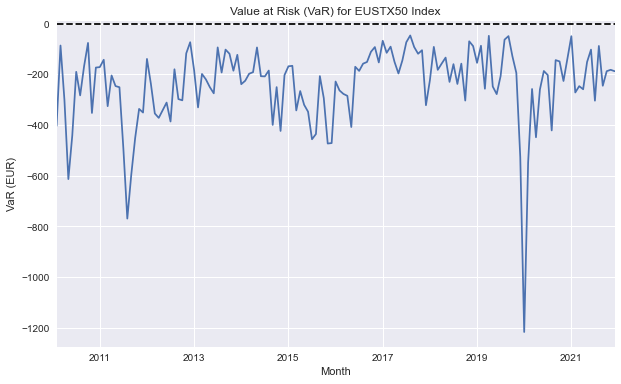

In [5]:
import matplotlib.pyplot as plt

# Set plot style
plt.style.use('seaborn')

# Plot VaR results for IT40 index
var_df['EUSTX50'].plot(kind='line', figsize=(10, 6))

# Set plot title and axis labels
plt.title('Value at Risk (VaR) for EUSTX50 Index')
plt.xlabel('Month')
plt.ylabel('VaR (EUR)')

# Add horizontal line for zero VaR
plt.axhline(y=0, color='black', linestyle='--')

# Show plot
plt.show()


In [6]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Load data from csv
df1 = pd.read_csv("europedailyprices.csv", parse_dates=["Date"], index_col="Date")

# Define confidence level and holding period
conf_level = 0.99
holding_period = 144 * 30  # 144 months * 30 days/month

# Define monthly amount to invest in one index
monthly_investment = 100

# Calculate daily returns
returns = df1.pct_change()

# Calculate mean and standard deviation of returns for each index
mean_returns = returns.mean()
std_returns = returns.std()

# Create DataFrame to store VaR for each month
var_df = pd.DataFrame(index=pd.date_range(start=df1.index[0], end=df1.index[-1], freq='MS'))

# Loop through each month
for month in var_df.index:
    # Define start and end dates for the month
    start_date = month
    end_date = start_date + pd.DateOffset(months=1) - pd.DateOffset(days=1)

    # Calculate portfolio value for the month
    portfolio_value = pd.DataFrame(np.zeros_like(df1.loc[start_date:end_date]), index=df1.loc[start_date:end_date].index, columns=df1.columns)
    cumulative_investment = 0
    for i, date in enumerate(df1.loc[start_date:end_date].index):
        if i % 30 == 0 and cumulative_investment < 14400:
            index_name = 'DAX'  # Replace with the index you want to invest in
            amount_to_invest = monthly_investment
            shares_to_buy = amount_to_invest / df1.loc[date, index_name]
            portfolio_value.loc[date:, index_name] += shares_to_buy * df1.loc[date:, index_name]
            cumulative_investment += monthly_investment
        else:
            portfolio_value.loc[date] = portfolio_value.loc[df1.loc[start_date:end_date].index[i-1]]

    # Calculate portfolio returns for the month
    portfolio_returns = portfolio_value.pct_change()

    # Calculate portfolio mean and standard deviation of returns for the month
    portfolio_mean_return = portfolio_returns.mean().iloc[0]
    portfolio_std_return = portfolio_returns.std().iloc[0]

    # Calculate VaR for the index for the month
    index_name = 'DAX'  # Replace with the index you invested in
    index_returns = returns.loc[start_date:end_date, index_name]
    index_mean_return = mean_returns[index_name]
    index_std_return = std_returns[index_name]

    # Calculate VaR using historical simulation method for the month
    sorted_returns = np.sort(index_returns.dropna())
    portfolio_value_at_risk = sorted_returns[int(np.ceil((1 - conf_level) * len(sorted_returns)))]
    index_value_at_risk = portfolio_value_at_risk * monthly_investment * 144

    # Store VaR for the month in the DataFrame
    var_df.loc[month, index_name] = index_value_at_risk

# Print VaR DataFrame
print(var_df)


                   DAX
2010-02-01 -257.382655
2010-03-01  -71.565172
2010-04-01 -253.029111
2010-05-01 -449.737283
2010-06-01 -275.293453
...                ...
2021-08-01 -300.799030
2021-09-01 -113.906432
2021-10-01 -159.666511
2021-11-01 -195.031885
2021-12-01 -270.742463

[143 rows x 1 columns]


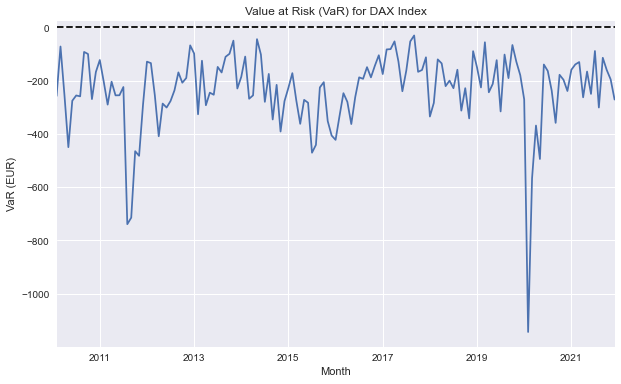

In [7]:
import matplotlib.pyplot as plt

# Set plot style
plt.style.use('seaborn')

# Plot VaR results for IT40 index
var_df['DAX'].plot(kind='line', figsize=(10, 6))

# Set plot title and axis labels
plt.title('Value at Risk (VaR) for DAX Index')
plt.xlabel('Month')
plt.ylabel('VaR (EUR)')

# Add horizontal line for zero VaR
plt.axhline(y=0, color='black', linestyle='--')

# Show plot
plt.show()


In [8]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Load data from csv
df1 = pd.read_csv("europedailyprices.csv", parse_dates=["Date"], index_col="Date")

# Define confidence level and holding period
conf_level = 0.99
holding_period = 144 * 30  # 144 months * 30 days/month

# Define monthly amount to invest in one index
monthly_investment = 100

# Calculate daily returns
returns = df1.pct_change()

# Calculate mean and standard deviation of returns for each index
mean_returns = returns.mean()
std_returns = returns.std()

# Create DataFrame to store VaR for each month
var_df = pd.DataFrame(index=pd.date_range(start=df1.index[0], end=df1.index[-1], freq='MS'))

# Loop through each month
for month in var_df.index:
    # Define start and end dates for the month
    start_date = month
    end_date = start_date + pd.DateOffset(months=1) - pd.DateOffset(days=1)

    # Calculate portfolio value for the month
    portfolio_value = pd.DataFrame(np.zeros_like(df1.loc[start_date:end_date]), index=df1.loc[start_date:end_date].index, columns=df1.columns)
    cumulative_investment = 0
    for i, date in enumerate(df1.loc[start_date:end_date].index):
        if i % 30 == 0 and cumulative_investment < 14400:
            index_name = 'IBEX35'  # Replace with the index you want to invest in
            amount_to_invest = monthly_investment
            shares_to_buy = amount_to_invest / df1.loc[date, index_name]
            portfolio_value.loc[date:, index_name] += shares_to_buy * df1.loc[date:, index_name]
            cumulative_investment += monthly_investment
        else:
            portfolio_value.loc[date] = portfolio_value.loc[df1.loc[start_date:end_date].index[i-1]]

    # Calculate portfolio returns for the month
    portfolio_returns = portfolio_value.pct_change()

    # Calculate portfolio mean and standard deviation of returns for the month
    portfolio_mean_return = portfolio_returns.mean().iloc[0]
    portfolio_std_return = portfolio_returns.std().iloc[0]

    # Calculate VaR for the index for the month
    index_name = 'IBEX35'  # Replace with the index you invested in
    index_returns = returns.loc[start_date:end_date, index_name]
    index_mean_return = mean_returns[index_name]
    index_std_return = std_returns[index_name]

    # Calculate VaR using historical simulation method for the month
    sorted_returns = np.sort(index_returns.dropna())
    portfolio_value_at_risk = sorted_returns[int(np.ceil((1 - conf_level) * len(sorted_returns)))]
    index_value_at_risk = portfolio_value_at_risk * monthly_investment * 144

    # Store VaR for the month in the DataFrame
    var_df.loc[month, index_name] = index_value_at_risk

# Print VaR DataFrame
print(var_df)


                IBEX35
2010-02-01 -238.691535
2010-03-01 -168.883066
2010-04-01 -603.417038
2010-05-01 -547.672538
2010-06-01 -436.253287
...                ...
2021-08-01 -117.122603
2021-09-01 -237.157175
2021-10-01 -117.526253
2021-11-01 -255.634402
2021-12-01 -177.883869

[143 rows x 1 columns]


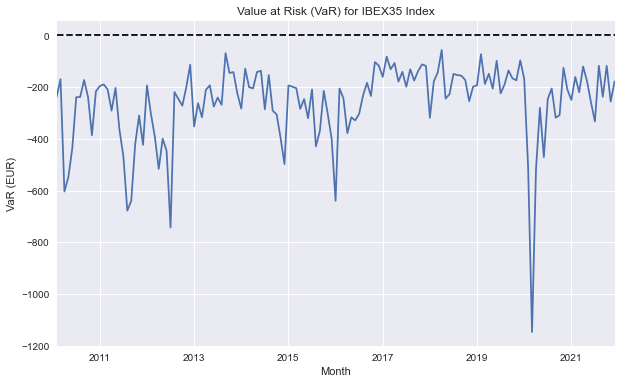

In [9]:
import matplotlib.pyplot as plt

# Set plot style
plt.style.use('seaborn')

# Plot VaR results for IT40 index
var_df['IBEX35'].plot(kind='line', figsize=(10, 6))

# Set plot title and axis labels
plt.title('Value at Risk (VaR) for IBEX35 Index')
plt.xlabel('Month')
plt.ylabel('VaR (EUR)')

# Add horizontal line for zero VaR
plt.axhline(y=0, color='black', linestyle='--')

# Show plot
plt.show()


In [10]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Load data from csv
df1 = pd.read_csv("europedailyprices.csv", parse_dates=["Date"], index_col="Date")

# Define confidence level and holding period
conf_level = 0.99
holding_period = 144 * 30  # 144 months * 30 days/month

# Define monthly amount to invest in one index
monthly_investment = 100

# Calculate daily returns
returns = df1.pct_change()

# Calculate mean and standard deviation of returns for each index
mean_returns = returns.mean()
std_returns = returns.std()

# Create DataFrame to store VaR for each month
var_df = pd.DataFrame(index=pd.date_range(start=df1.index[0], end=df1.index[-1], freq='MS'))

# Loop through each month
for month in var_df.index:
    # Define start and end dates for the month
    start_date = month
    end_date = start_date + pd.DateOffset(months=1) - pd.DateOffset(days=1)

    # Calculate portfolio value for the month
    portfolio_value = pd.DataFrame(np.zeros_like(df1.loc[start_date:end_date]), index=df1.loc[start_date:end_date].index, columns=df1.columns)
    cumulative_investment = 0
    for i, date in enumerate(df1.loc[start_date:end_date].index):
        if i % 30 == 0 and cumulative_investment < 14400:
            index_name = 'CAC40'  # Replace with the index you want to invest in
            amount_to_invest = monthly_investment
            shares_to_buy = amount_to_invest / df1.loc[date, index_name]
            portfolio_value.loc[date:, index_name] += shares_to_buy * df1.loc[date:, index_name]
            cumulative_investment += monthly_investment
        else:
            portfolio_value.loc[date] = portfolio_value.loc[df1.loc[start_date:end_date].index[i-1]]

    # Calculate portfolio returns for the month
    portfolio_returns = portfolio_value.pct_change()

    # Calculate portfolio mean and standard deviation of returns for the month
    portfolio_mean_return = portfolio_returns.mean().iloc[0]
    portfolio_std_return = portfolio_returns.std().iloc[0]

    # Calculate VaR for the index for the month
    index_name = 'CAC40'  # Replace with the index you invested in
    index_returns = returns.loc[start_date:end_date, index_name]
    index_mean_return = mean_returns[index_name]
    index_std_return = std_returns[index_name]

    # Calculate VaR using historical simulation method for the month
    sorted_returns = np.sort(index_returns.dropna())
    portfolio_value_at_risk = sorted_returns[int(np.ceil((1 - conf_level) * len(sorted_returns)))]
    index_value_at_risk = portfolio_value_at_risk * monthly_investment * 144

    # Store VaR for the month in the DataFrame
    var_df.loc[month, index_name] = index_value_at_risk

# Print VaR DataFrame
print(var_df)


                 CAC40
2010-02-01 -190.277637
2010-03-01 -133.792331
2010-04-01 -550.403138
2010-05-01 -420.576559
2010-06-01 -430.759043
...                ...
2021-08-01 -119.588633
2021-09-01 -250.688641
2021-10-01 -116.483935
2021-11-01 -180.202183
2021-12-01 -117.522085

[143 rows x 1 columns]


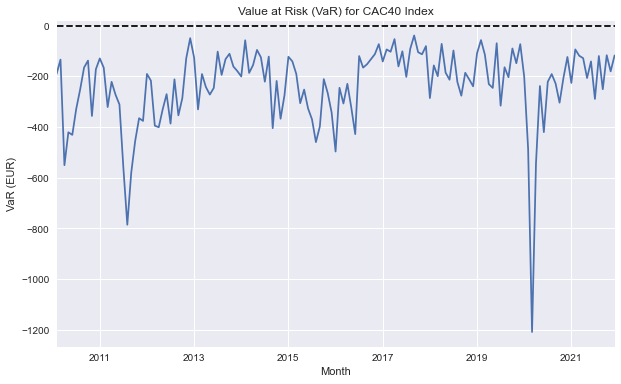

In [11]:
import matplotlib.pyplot as plt

# Set plot style
plt.style.use('seaborn')

# Plot VaR results for IT40 index
var_df['CAC40'].plot(kind='line', figsize=(10, 6))

# Set plot title and axis labels
plt.title('Value at Risk (VaR) for CAC40 Index')
plt.xlabel('Month')
plt.ylabel('VaR (EUR)')

# Add horizontal line for zero VaR
plt.axhline(y=0, color='black', linestyle='--')

# Show plot
plt.show()
